In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("train.csv", index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [30]:
del df['Ticket']
del df['Cabin']

In [31]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [51]:
# feature engineering for numericals
numeric_features = pd.DataFrame([['Age', 'Fare']])

In [52]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler

# create a sequential pipeline for numericals
numeric_transformer = make_pipeline(SimpleImputer(strategy="mean"), StandardScaler())

In [54]:
# feature engineering for categorical
categorical_features = pd.DataFrame(['Embarked'])

In [55]:
# to converts a categorical column(s)to a matrix of binary variables
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

In [70]:
from sklearn.compose import ColumnTransformer

#pre-process transformations
numeric_preprocessor = ColumnTransformer(
    transformers=("num", numeric_transformer, numeric_features))

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)])

### impute the missing values in the Age column

<AxesSubplot:>

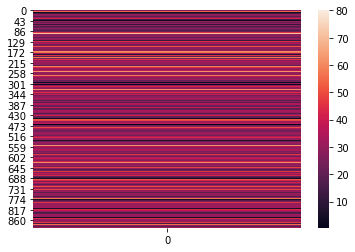

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean',)
imputer.fit(df[['Age']])
cols_imputed = pd.DataFrame(imputer.transform(df[['Age']]))
sns.heatmap(cols_imputed)

### one-hot-encode the Embarked column

In [7]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohc.fit(df[['Embarked']])
pd.DataFrame(ohc.transform(df[['Embarked']]))

,0,1,2,3
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
886,0.0,0.0,1.0,0.0
887,0.0,0.0,1.0,0.0
888,0.0,0.0,1.0,0.0
889,1.0,0.0,0.0,0.0


### bin the imputed Age column into 3 bins (young, middle-aged, old)

In [11]:
from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='quantile')
kbins.fit(cols_imputed)
df_bins = pd.DataFrame(kbins.transform(cols_imputed))
df_bins.head()

,0,1,2
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


### scale the Fare column

In [ ]:
from sklearn.preprocessing import MinMaxScaler
pd.DataFrame(MinMaxScaler().fit(df[['Fare']]).transform(df[['Fare']]), columns=df[['Fare']].columns)